<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231106_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

L(손실 함수)을 최소화 하는 $w_0, \ w_1, \cdots w_n$ 을 구하자

L의 최소점으로 가기 위해서는 음의 기울기로 이동해야 한다.

기울기는 미분으로 구한다.

$$
Y = x^2 \\
\\ \quad
\\
L = w^2 \\
\\ \quad
\\
L^{'} = 2w
$$

In [ ]:
w=2.0
L=w**2
w_history=[2.0]
eta = 0.1
for i in range(40):
    L_prime = 2*w
    w = w - eta*L_prime
    w_history.append(w)

In [ ]:
w_history

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

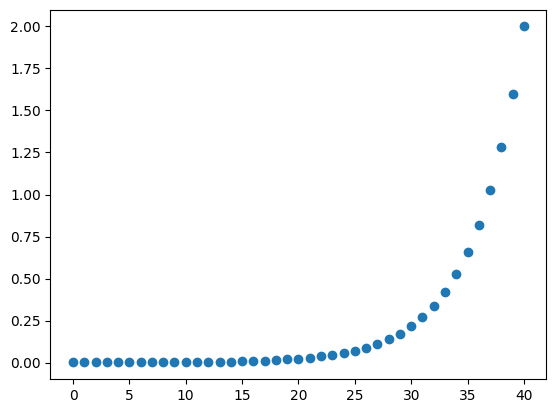

In [ ]:
plt.scatter(np.arange(len(w_history)), w_history[::-1])

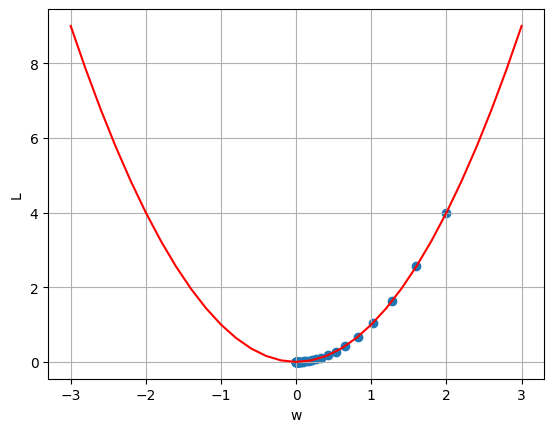

In [ ]:
w = np.arange(-3, 3.2, 0.2)
plt.plot(w, w**2, color='red')
w_= np.array(w_history)
plt.scatter(w_,w_**2)
plt.xlabel('w')
plt.ylabel('L')
plt.grid()

L(손실 함수)을 최소화 하는 $w_0, \ w_1, \cdots w_n$ 을 구하자

L의 최소점으로 가기 위해서는 음의 기울기로 이동해야 한다.

기울기는 미분으로 구한다.

모든 $w_0, \ w_1, \ \cdots \ , w_n$ 으로 미분을 해야 한다.

모든 $w_0, \ w_1, \ \cdots \ , w_n$ 으로 미분 한다는 것은 모든 방향으로 미분 한다는 것이다.

따라서 방향미분을 해야 한다.

방향 미분 $\ D_\vec{v}f(x)$ 를 해보자. 즉, 주어진 x 에서 $\vec{v}$ 방향으로 움직일때, f(x) 가 얼마나 변하는지 알아보자

$$
D_\vec{v}f(x) = \vec{\nabla}f(x) \cdot \vec{v}
$$

$$
f'(x) = 	\lim_{h \to 0} {{f(x+h) - f(x)} \over h}
$$

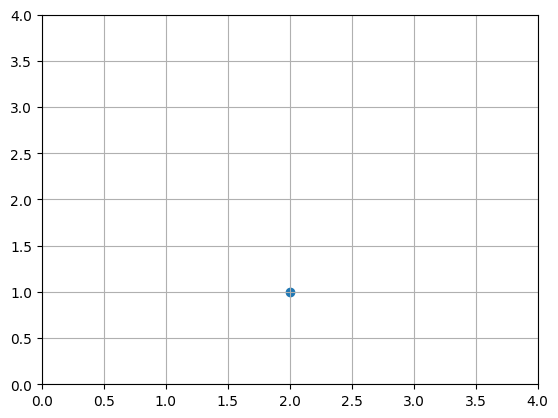

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(2, 1)
plt.xlim(0,4)
plt.ylim(0,4)
plt.grid()

$$
f(x, y) = x^2 + y^2 \\
\\ \quad
\\
점 \ p \ (2, 1)
\\ \quad
\\
$$

$\ D_\vec{v}f(x)$ 계산


x로 1, y로 0의 방향으로 h 만큼 움직인다. => (1, 0)방향 으로  h 만큼 이동

$$
\\ \quad
\\
(2, 1) \ + \ h \ (1, 0) \ = \ (2+h, 1)
\\ \quad
\\
$$
이때, 주어진 f(x, y) 평균 변화율은 얼마인가?


$$
\\ \quad
\\
{f(2+h, 1) - f(2, 1)} \over h
\\ \quad
\\
$$

순간 변화율

$$
\lim_{h \to 0} {{f(2+h, 1) - f(2, 1)} \over h} = { {(2+h)^2 + 1^2 - ( 2^2 + 1^2)} \over h} = { 4h + h^2 \over h} = 4
$$

(0, 1) 방향으로 h 만큼 이동

순간 변화율

$$
\lim_{h \to 0} {{f(2, 1+h) - f(2, 1)} \over h} = { {2^2 + (1+h)^2 - ( 2^2 + 1^2)} \over h} = { 2h + h^2 \over h} = 2
$$

(1, 1) 방향으로 h 만큼 이동

순간 변화율

$$
\lim_{h \to 0} {{f(2+h, 1+h) - f(2, 1)} \over h} = { {(2+h)^2 + (1+h)^2 - ( 2^2 + 1^2)} \over h}
= { 4h + h^2 + 2h + h^2 \over h} = 6
$$

$\vec{\nabla}f(x) \cdot \vec{v}$ 계산

$$
\nabla f = ({\partial f \over \partial x}, {\partial f \over \partial y})
\\ \quad
\\
\nabla f = (2x, 2y)
$$
점 (2, 1) 에서의 $\nabla f$ 는 얼마인가

$$
\nabla f(2, 1)= (2 \cdot 2, 2 \cdot 1) = (4, 2)
$$

1) $\vec{v} = (1, 0) $ 일때

$$ (4, 2) \bullet (1, 0) = 4 $$

2) $\vec{v} = (0, 1) $ 일때

$$ (4, 2) \bullet (0, 1) = 2 $$

3) $\vec{v} = (1, 1) $ 일때

$$ (4, 2) \bullet (1, 1) = 6 $$

아래 식이 계산 되는 과정을 확인했다.

$$
D_\vec{v}f(x) = \nabla f(x) \cdot \vec{v}
\\ \quad
\\
$$
$\nabla f(x)$ 의 크기를 생각해 보자
$$
\nabla f(x) \cdot \vec{v} \\ \quad
\\
= |\nabla f(x) | \ |\vec{v}| \ cos \theta \\ \quad
\\
= |\nabla f(x) | \ cos \theta
$$

최고로 증가하는 방향으로 편미분

$$
w = w - \eta {\partial L \over \partial w}
$$

$$
f'(x) = 	\lim_{h \to 0} {{f(x+h) - f(x)} \over h}
$$

784*(50,100)*(100, 10)


In [ ]:
784*50 + 50*100 + 100*10

45200

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx] #(2,1)
        x[idx] = tmp_val + h # (2, 1)-> (2+h, 1+h)
        fxh1 = f(x) # f(2+h, 1+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    return grad

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [ ]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [ ]:
def numerical_gradient(f, x): #f 손실함수
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

In [ ]:
x = np.arange(20).reshape(2, 2, 5)

In [ ]:
x

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

In [ ]:
it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
    idx = it.multi_index
    print(idx, x[idx])
    it.iternext()

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

Text(0, 0.5, 'X1')

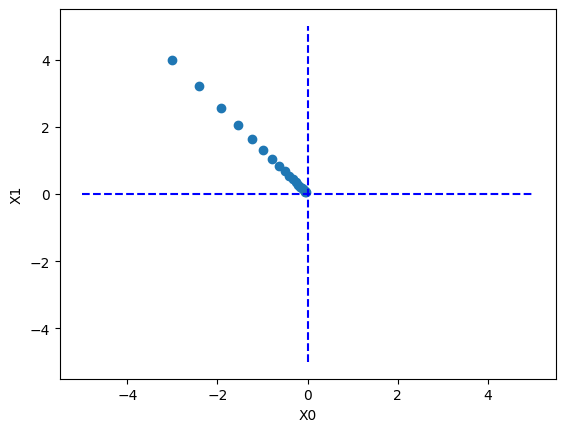

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad
        #print(x)

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot(x_history[:, 0], x_history[:, 1], 'o')
plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.xlabel('X0')
plt.ylabel('X1')

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

In [ ]:
x_ = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = x_, lr=10)

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
x_ = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = x_, lr=1e-10)

array([-2.99999994,  3.99999992])

신경망 기울기: 가중치 매개변수에 관한 손실 함수의 기울기

형상 2X3, 가중치 W, 손실함수 L인 신경망 수식

\begin{equation*}
W =  \begin{vmatrix}
w_{11} \quad w_{21} \quad w_{31}\\
w_{12} \quad w_{22} \quad w_{32}\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\frac{\partial{L}}{\partial{W}} =  \begin{vmatrix}
\frac{\partial{L}}{\partial{W_{11}}} \quad \frac{\partial{L}}{\partial{W_{21}}} \quad \frac{\partial{L}}{\partial{W_{31}}}\\
\frac{\partial{L}}{\partial{W_{12}}} \quad \frac{\partial{L}}{\partial{W_{22}}} \quad \frac{\partial{L}}{\partial{W_{32}}}\
\end{vmatrix}
\end{equation*}

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [ ]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z=self.predict(x)
        y=softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [ ]:
def softmax(a):
    c = np.max(a) # 9 -> 3, 9
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [ ]:
x = np.array([[1, 2, 3], [4, 9, 7]])

In [ ]:
softmax(x)

array([[2.92776073e-04, 7.95847880e-04, 2.16333883e-03],
       [5.88056463e-03, 8.72753175e-01, 1.18114298e-01]])

In [ ]:
z1 = softmax(np.array([1, 2, 3]))

In [ ]:
z1

array([0.09003057, 0.24472847, 0.66524096])

In [ ]:
z1.sum()

0.9999999999999999

In [ ]:
z2 = softmax(np.array([4, 9, 7]))

In [ ]:
z2

array([0.00589975, 0.8756006 , 0.11849965])

In [ ]:
z2.sum()

1.0000000000000002

In [ ]:
result = softmax(x)

In [ ]:
result

array([[2.92776073e-04, 7.95847880e-04, 2.16333883e-03],
       [5.88056463e-03, 8.72753175e-01, 1.18114298e-01]])

In [ ]:
result[0].sum()

0.003251962784670456

In [ ]:
result[1].sum()

0.9967480372153293

In [ ]:
result[0].sum() + result[1].sum()

0.9999999999999998

In [ ]:
np.max(x)

9

원하는 최대값 : 3, 9가 나오게 하자

In [ ]:
np.max(x, axis=1)

array([3, 9])

In [ ]:
def softmax(a):
    c = np.max(a, axis=1) # 9 -> 3, 9
    print(c)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [ ]:
softmax(x)

[3 9]


ValueError: ignored

In [ ]:
x-np.array([3, 9])

ValueError: ignored

In [ ]:
c = np.array([3, 9])

In [ ]:
x

array([[1, 2, 3],
       [4, 9, 7]])

In [ ]:
x-c

ValueError: ignored

In [ ]:
x-c.T

ValueError: ignored

In [ ]:
c.T

array([3, 9])

In [ ]:
c

array([3, 9])

In [ ]:
c.shape

(2,)

In [ ]:
x.T

array([[1, 4],
       [2, 9],
       [3, 7]])

In [ ]:
c

array([3, 9])

In [ ]:
x.T - c

array([[-2, -5],
       [-1,  0],
       [ 0, -2]])

In [ ]:
def softmax(a):
    c = np.max(a, axis=1) # 9 -> 3, 9
    exp_a = np.exp(a.T-c)
    sum_exp_a = np.sum(exp_a)
    #sum_exp_a = np.sum(exp_a, axis=0)
    y = exp_a / sum_exp_a
    return y.T

In [ ]:
res = softmax(x)
res[0].sum()

0.5682612820162696

In [ ]:
def softmax(a):
    c = np.max(a, axis=1) # 9 -> 3, 9
    exp_a = np.exp(a.T-c)
    #sum_exp_a = np.sum(exp_a)
    sum_exp_a = np.sum(exp_a, axis=0)
    y = exp_a / sum_exp_a
    return y.T

In [ ]:
res = softmax(x)
res[0].sum()

0.9999999999999999

In [ ]:
x1 = x.T-c

In [ ]:
x1

array([[-2, -5],
       [-1,  0],
       [ 0, -2]])

In [ ]:
exp_x1 = np.exp(x1)

In [ ]:
exp_x1

array([[0.13533528, 0.00673795],
       [0.36787944, 1.        ],
       [1.        , 0.13533528]])

In [ ]:
np.sum(exp_x1, axis=0)

array([1.50321472, 1.14207323])

In [ ]:
real_result = softmax(x)

In [ ]:
real_result

array([[0.09003057, 0.24472847, 0.66524096],
       [0.00589975, 0.8756006 , 0.11849965]])

In [ ]:
real_result[0].sum()

0.9999999999999999

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [ ]:
net = simpleNet()

In [ ]:
net.W

array([[-0.92168592,  1.72605466,  0.46688879],
       [ 2.13451461, -0.70972072, -0.76135586]])

In [ ]:
x = np.array([0.6, 0.9])

In [ ]:
p = net.predict(x)

In [ ]:
p

array([ 1.3680516 ,  0.39688414, -0.405087  ])

In [ ]:
np.argmax(p)

0

In [ ]:
t = np.array([1, 0, 0])

In [ ]:
net.loss(x, t)

0.4372479433850005

In [ ]:
cross_entropy_error(softmax(np.dot(x, net.W)),t)

0.4372266924739439

In [ ]:
numerical_gradient(net.loss(x, t), net.W)

TypeError: ignored

In [ ]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[-0.21250499  0.14671259  0.0657924 ]
 [-0.31875749  0.22006889  0.0986886 ]]


In [ ]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.21250499  0.14671259  0.0657924 ]
 [-0.31875749  0.22006889  0.0986886 ]]


#2층 신경망 구현하기

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x))*sigmoid(x)

In [ ]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy_ = np.sum(y == t)/float(x.shape[0])
        return accuracy_

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [ ]:
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [ ]:
t = np.random.rand(100, 10)

In [ ]:
grads = net.numerical_gradient(x, t)

In [ ]:
grads.keys()

dict_keys(['W1', 'b1', 'W2', 'b2'])

In [ ]:
grads['b1']

array([-8.49508930e-05, -1.14399341e-04,  2.04291426e-04,  1.06607501e-05,
       -1.67831882e-05, -3.28588881e-04, -4.34199610e-05,  3.88812094e-05,
       -1.68522960e-04,  2.59182993e-04, -3.45952531e-04,  1.06741052e-04,
        1.08285110e-04, -8.67057026e-05, -2.68518652e-05,  3.38873241e-05,
       -1.00460325e-04, -2.13153291e-04, -8.13567769e-05,  3.19229179e-04,
       -7.42484740e-06,  4.57469174e-06, -2.31782529e-04, -9.73513647e-05,
        6.00751937e-05, -4.47409665e-06,  2.81012873e-04,  1.40725778e-04,
       -5.76795633e-05,  3.26290042e-04,  1.07688576e-04,  2.35141160e-04,
       -2.66754618e-05,  1.38343870e-05,  2.77090395e-05,  1.25572366e-04,
       -9.24415411e-05, -8.99888875e-05, -1.24314474e-04, -3.28717653e-05,
        2.97423830e-04,  1.63217575e-04, -1.28292590e-04, -2.10747197e-05,
        1.78252206e-04, -1.51644854e-04,  1.41892527e-04, -4.70379802e-05,
       -1.39318448e-04,  4.45828685e-05, -1.22439769e-04, -2.70602136e-04,
        1.59103530e-04,  

In [ ]:
from drive.MyDrive.data.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True,
                                                  one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iter_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1) #60000 = 100 * 600

for i in range(iter_num):

    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch,t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc : ', train_acc, ', test acc : ', test_acc)

train acc :  0.09736666666666667 , test acc :  0.0982
train acc :  0.7755333333333333 , test acc :  0.7791
train acc :  0.8765333333333334 , test acc :  0.8814
train acc :  0.8987333333333334 , test acc :  0.9015
train acc :  0.9075 , test acc :  0.9099
train acc :  0.9139833333333334 , test acc :  0.9163
train acc :  0.9181333333333334 , test acc :  0.9206
train acc :  0.9233 , test acc :  0.9245
train acc :  0.92735 , test acc :  0.9272
train acc :  0.9305 , test acc :  0.9298
train acc :  0.9332166666666667 , test acc :  0.9333
train acc :  0.9365666666666667 , test acc :  0.9349
train acc :  0.9390333333333334 , test acc :  0.9379
train acc :  0.9413833333333333 , test acc :  0.9401
train acc :  0.94305 , test acc :  0.9402
train acc :  0.9449333333333333 , test acc :  0.9421
train acc :  0.9469833333333333 , test acc :  0.9434


In [ ]:
train_loss_list

(0.0, 3.0)

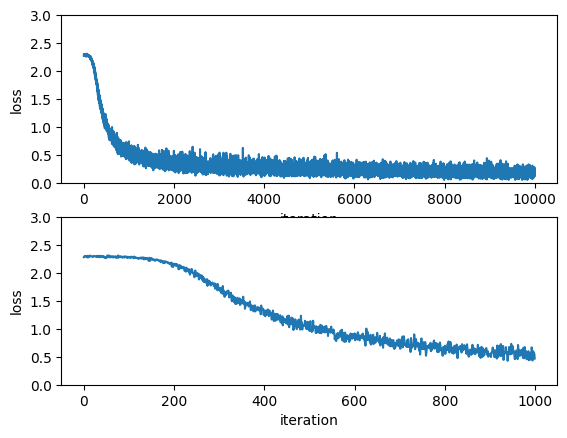

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1)
x = np.array(range(iter_num))
ax1.plot(x, train_loss_list, label='loss')
ax1.set_xlabel("iteration")
ax1.set_ylabel("loss")
ax1.set_ylim(0, 3.0)
ax2.plot(x[:1000], train_loss_list[:1000], label='loss')
ax2.set_xlabel("iteration")
ax2.set_ylabel("loss")
ax2.set_ylim(0, 3.0)

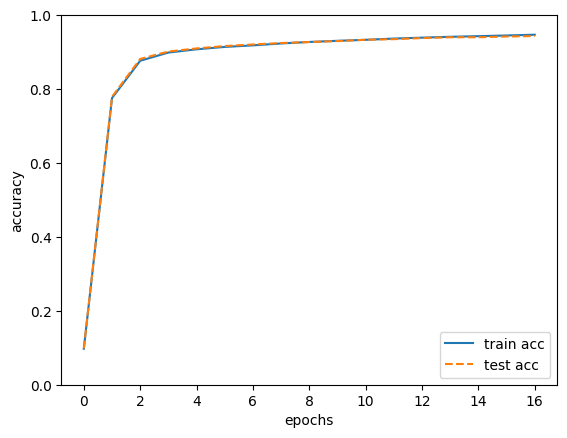

In [ ]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
nwt_grads = TwoLayerNet(784, 50, 10)
x_batch = x_train[:4]
t_batch = t_train[:4]

In [ ]:
x_batch.shape, t_batch.shape

((4, 784), (4, 10))

In [ ]:
grad_numerical = nwt_grads.numerical_gradient(x_batch, t_batch)
grad_back = nwt_grads.gradient(x_batch, t_batch)

In [ ]:
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_back[key]-grad_numerical[key]))
    print(diff)

3.877440596117656e-13
1.0688333142269864e-12
1.4859224656271762e-11
1.1990408388395936e-10


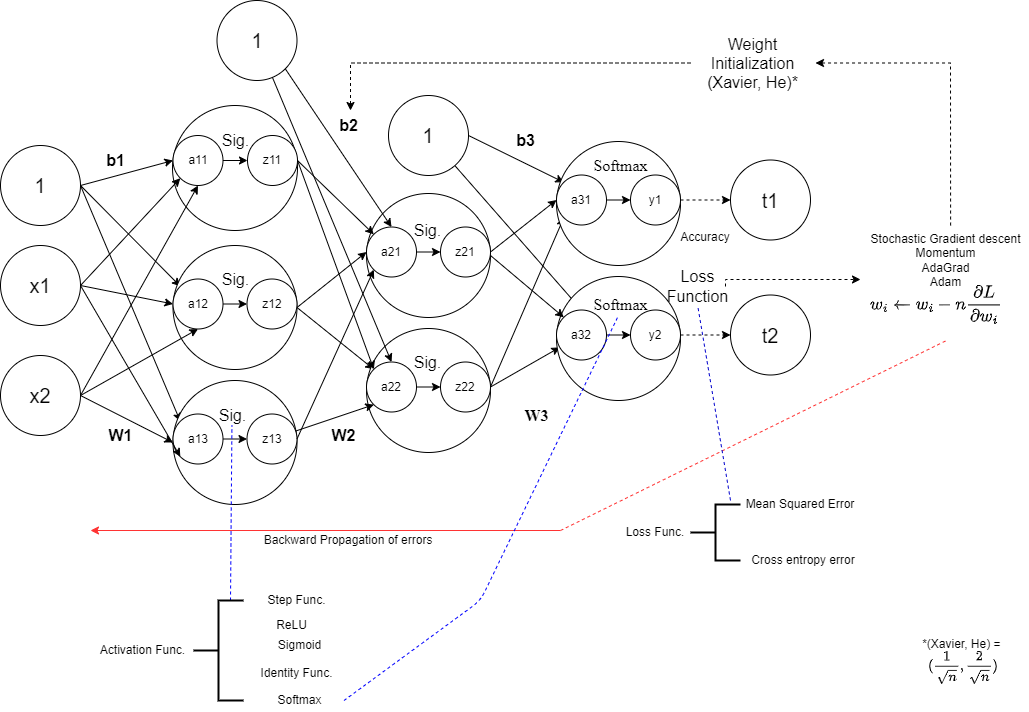

형상 2X3, 가중치 W, 손실함수 L인 신경망 수식

\begin{equation*}
W =  \begin{vmatrix}
w_{11} \quad w_{21} \quad w_{31}\\
w_{12} \quad w_{22} \quad w_{32}\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\frac{\partial{L}}{\partial{W}} =  \begin{vmatrix}
\frac{\partial{L}}{\partial{W_{11}}} \quad \frac{\partial{L}}{\partial{W_{21}}} \quad \frac{\partial{L}}{\partial{W_{31}}}\\
\frac{\partial{L}}{\partial{W_{12}}} \quad \frac{\partial{L}}{\partial{W_{22}}} \quad \frac{\partial{L}}{\partial{W_{32}}}\
\end{vmatrix}
\end{equation*}

$$
\\ \quad
\\
{\partial L \over \partial Y} \ (3,)
$$

#오차역전파 (BackPropagation)



계산 그래프 : 계산 과정을 그래프로 나타낸 것

node & edge

node : 동그라미, 연산자

edge : 노드 사이의 직선, 결과값

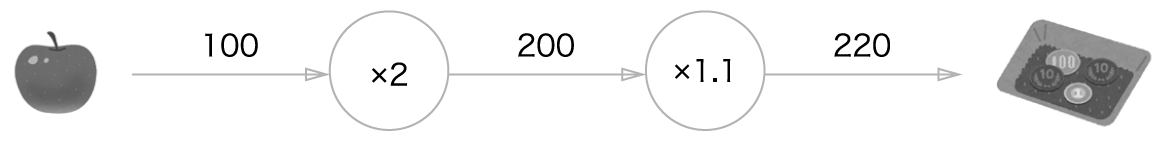

사과 2개, 귤(단가 150원) 3개, 소비세 10% 일때 지불 금액

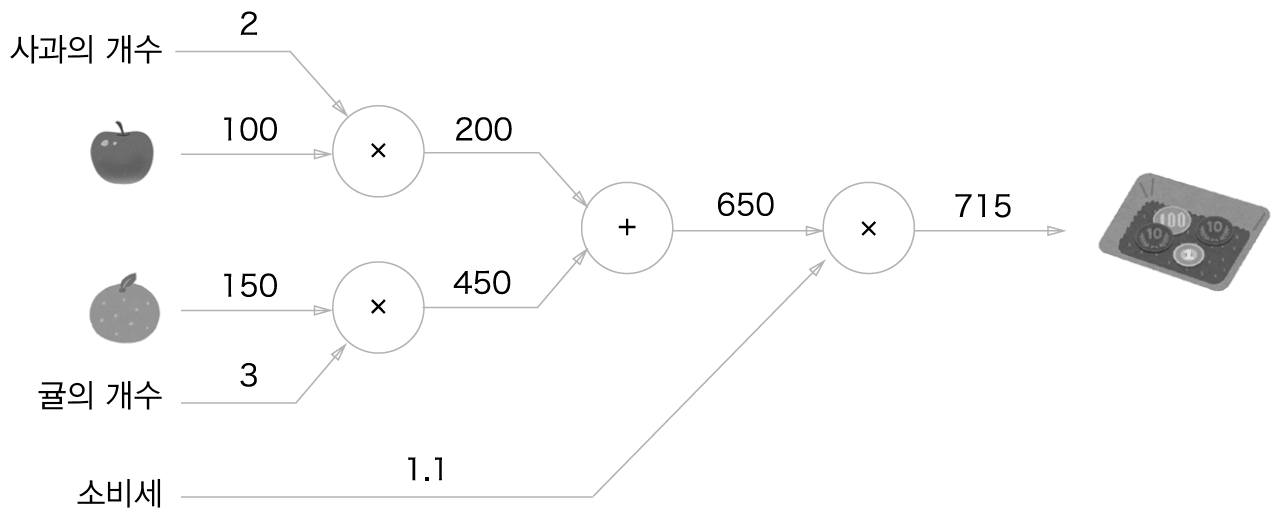

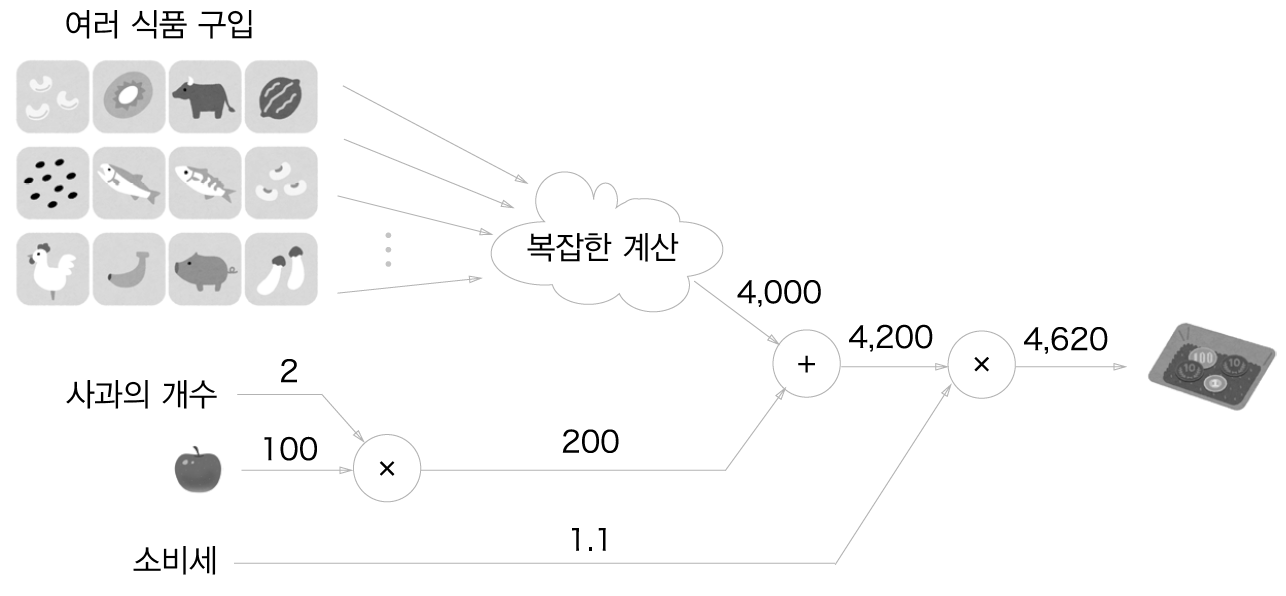

계산그래프의 응용

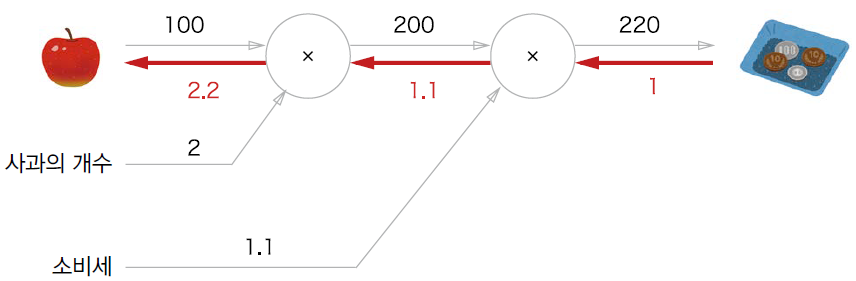

사과 가격이 101원으로 올랐다

금액 2개 살때 총 금액은?

In [ ]:
101*2*1.1

222.20000000000002

In [ ]:
101*2.2

222.20000000000002

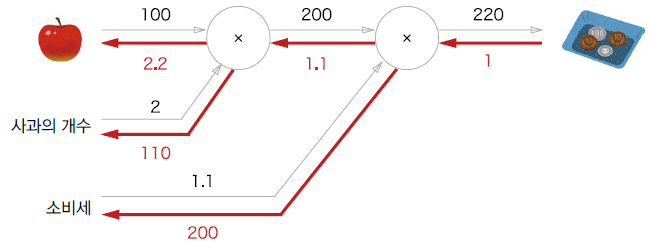

사과를 3개 사면 총 낼 금액

In [ ]:
3*110

330

In [ ]:
100*3*1.1

330.0

사과 가격의 변화 -> 총 금액의 변화, 2.2 = 총금액변화/사과 가격변화

사과 개수의 변화 -> 총 금액의 변화, 110 = 총 금액 변화 / 사과 개수변화

###  계산 그래프의 역전파

계산 그래프의 역전파: 순방향과는 반대 방향으로 국소적 미분을 곱한다.

역전파의 계산 절차는 신호 E에 노드의 국소적 미분을 곱한 후 다음 노드로 전달

역전파의 계산 순에 따르면 목표로 하는 미분 값을 효율적으로 구할 수 있음

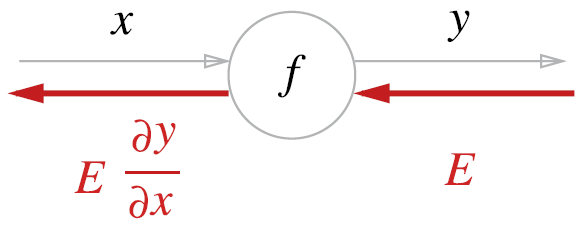

1) 덧셈의 역전파

$$
z = x + y \\
{{\partial z} \over {\partial x}} = 1, \quad
{{\partial z} \over {\partial y}} = 1
$$

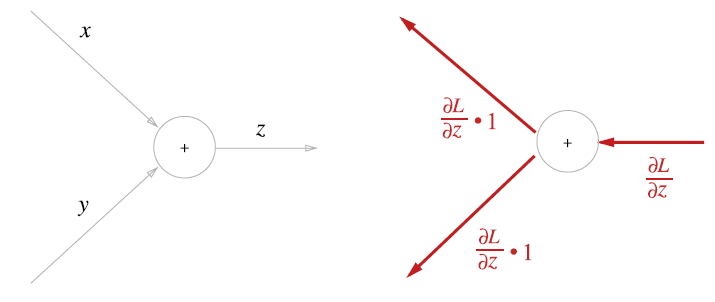

#곱셉 역전파

y = ax, z = xy

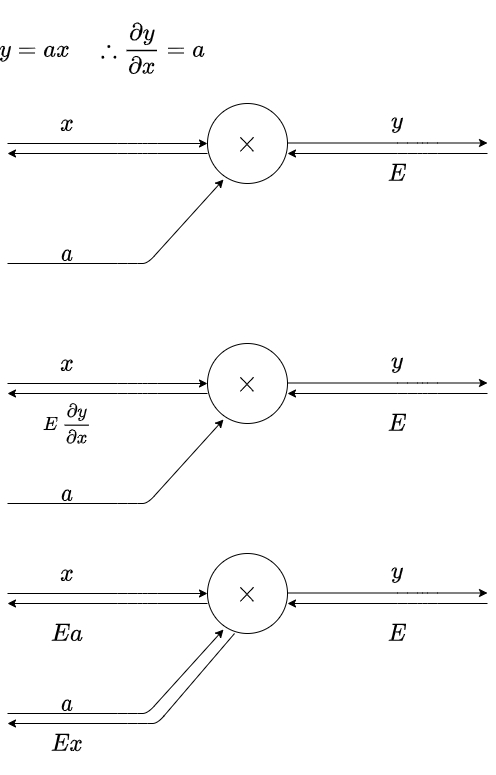

z = xy

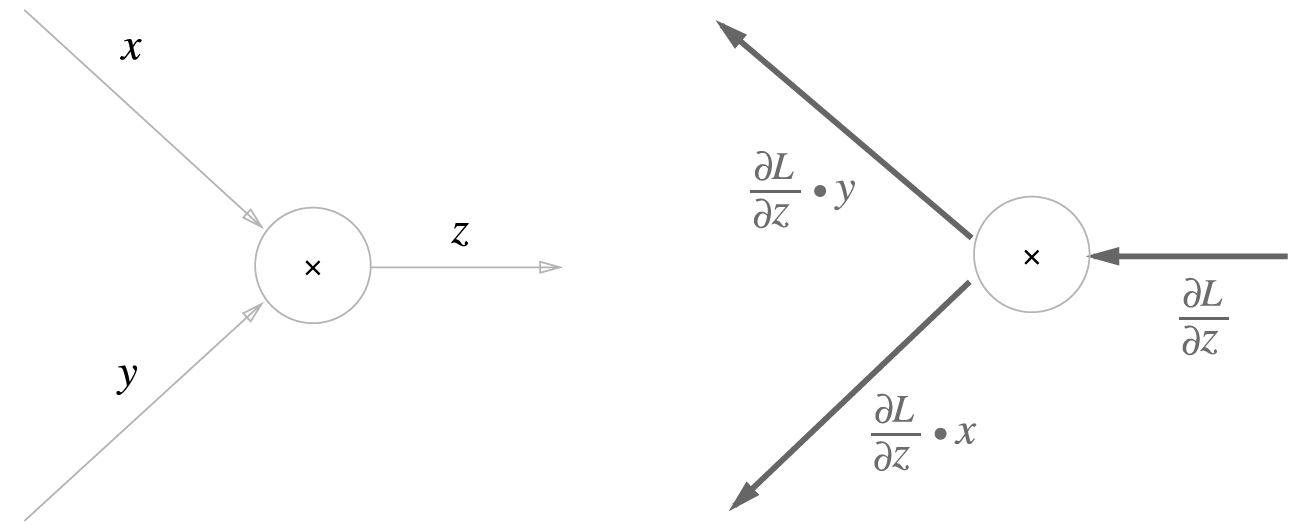

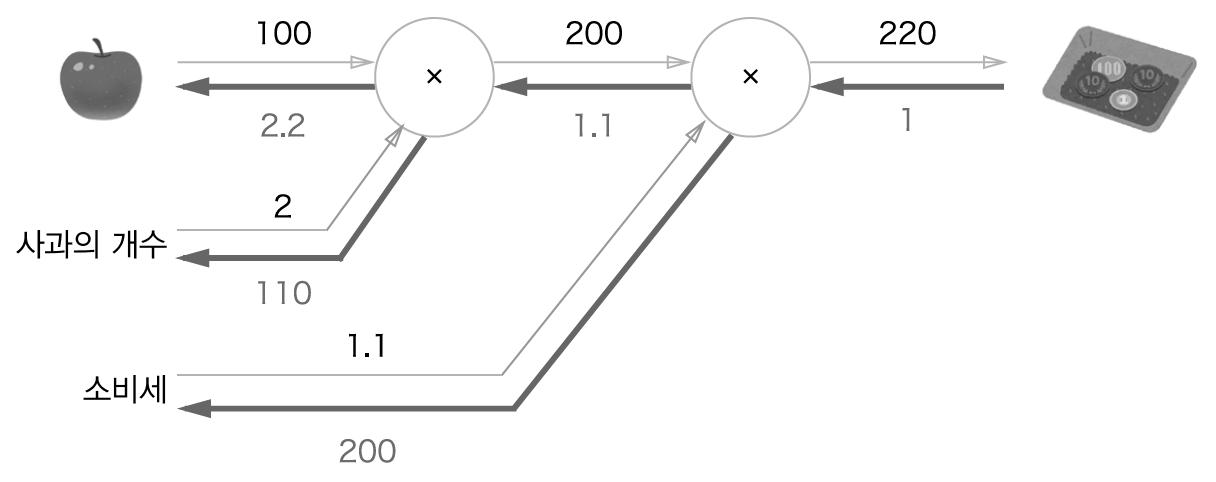

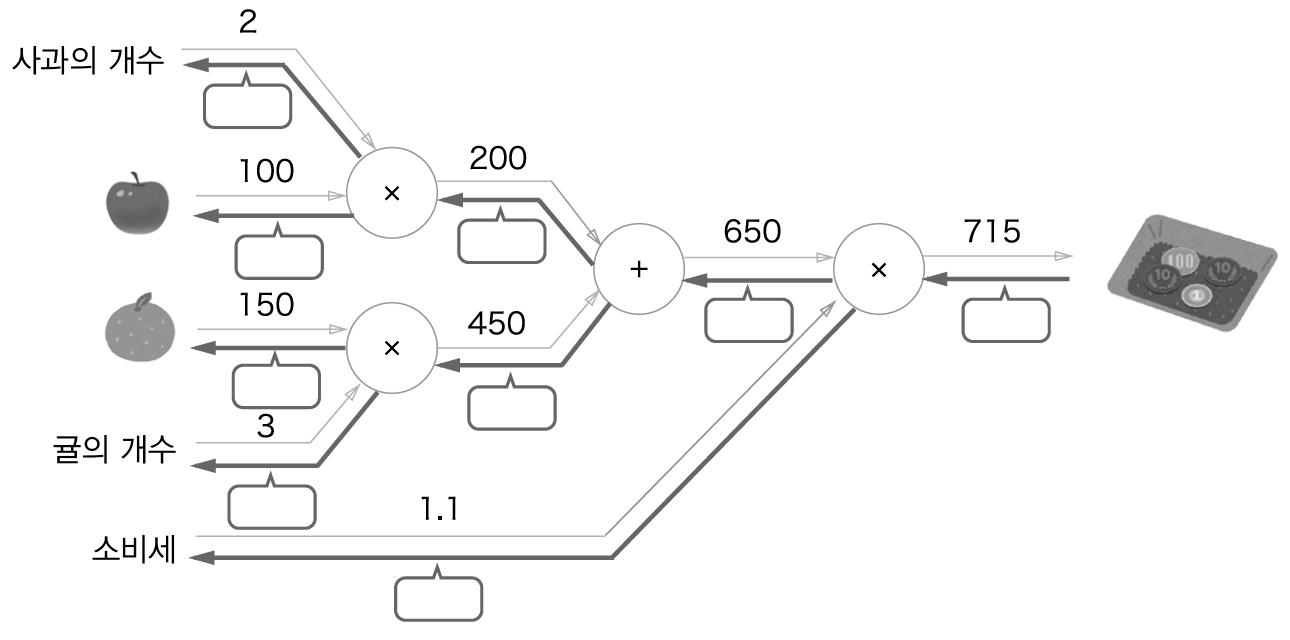

#Relu 함수의 오차역전파

\begin{equation*}
y = x ( x > 0 )
\end{equation*}

\begin{equation*}
y = 0 ( x <= 0 )
\end{equation*}

#### 위 식을 x에 대하여 각각 미분 하면

\begin{equation*}
\frac{\partial y}{\partial x} = 1 ( x > 0 )
\end{equation*}

\begin{equation*}
\frac{\partial y}{\partial x} = 0 ( x <= 0 )
\end{equation*}

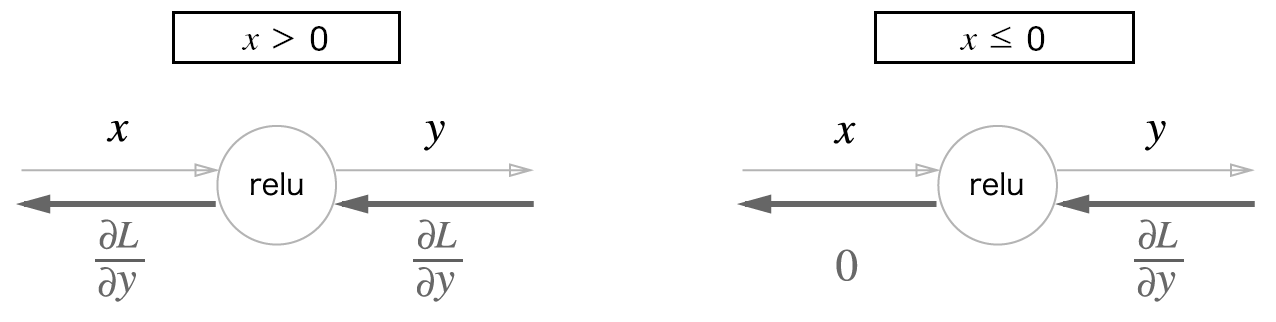

In [ ]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [ ]:
x = np.array([[1.0, 0.5], [-2.0, 3.0]])

In [ ]:
x

array([[ 1. ,  0.5],
       [-2. ,  3. ]])

In [ ]:
mask = (x<=0)

In [ ]:
mask # 0 보다 작은 값의 위치를 찾아 준것이다.

array([[False, False],
       [ True, False]])

In [ ]:
out = x.copy()

In [ ]:
out

array([[ 1. ,  0.5],
       [-2. ,  3. ]])

In [ ]:
out[mask]=0.

In [ ]:
out

array([[1. , 0.5],
       [0. , 3. ]])

In [ ]:
y = out

In [ ]:
y

array([[1. , 0.5],
       [0. , 3. ]])

#Sigmoid 오차역전파

\begin{equation*}
y = \frac{1}{1 + exp(-x)}
\end{equation*}

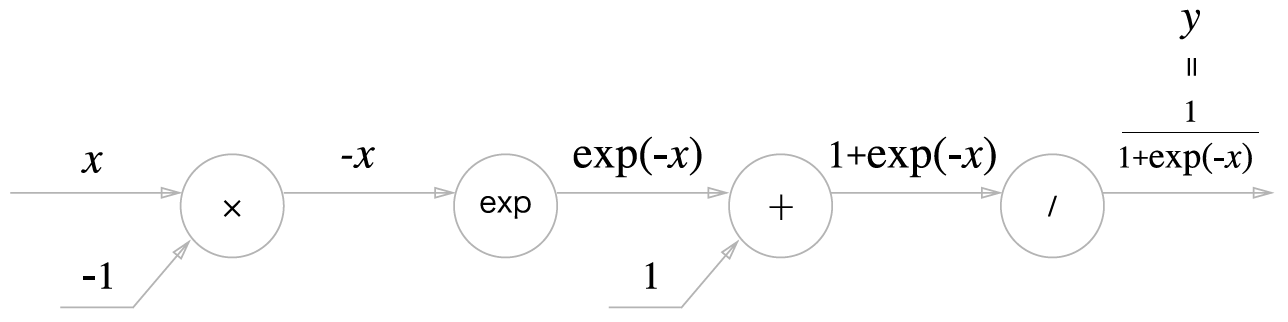

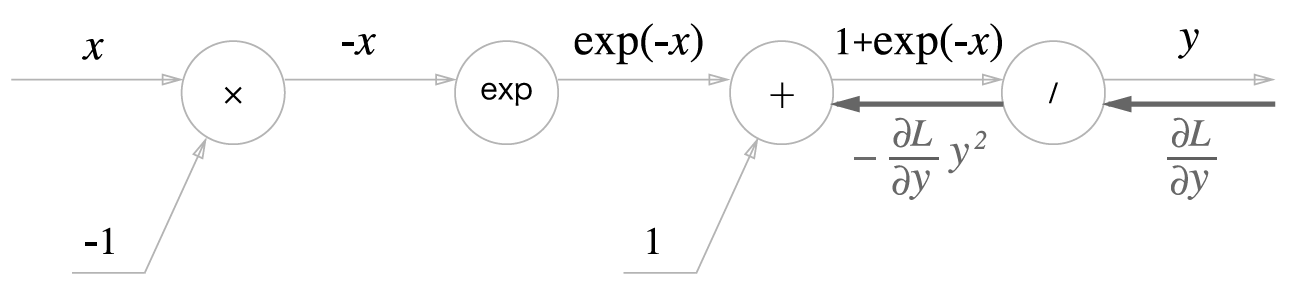

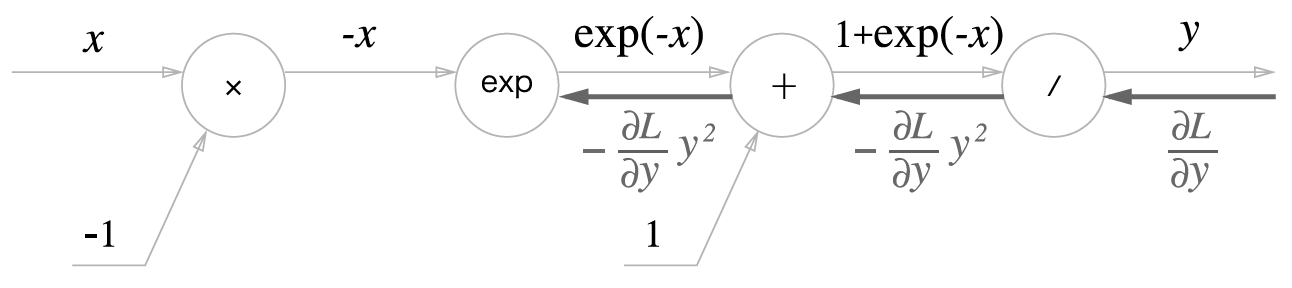

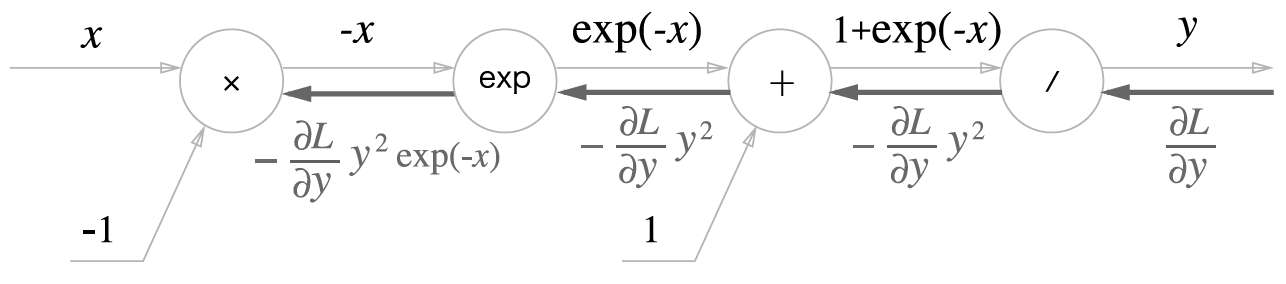

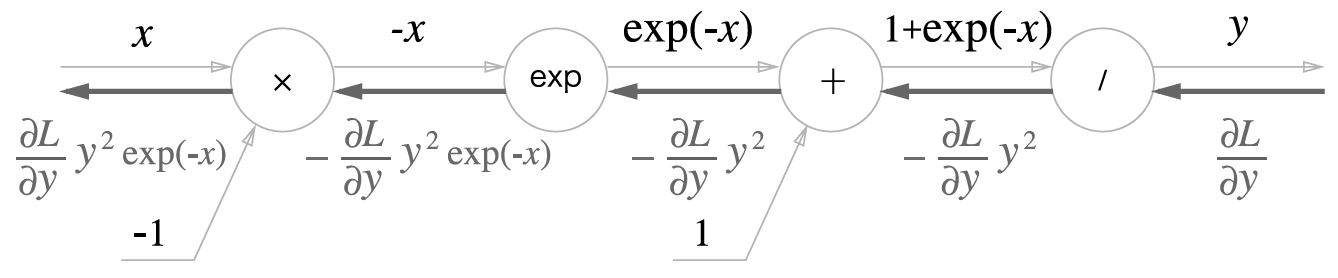

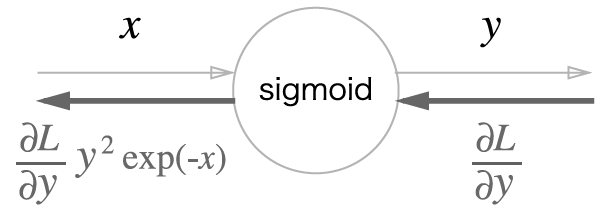

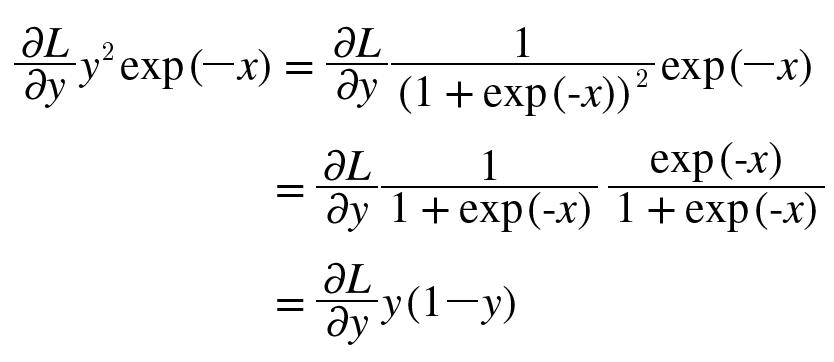

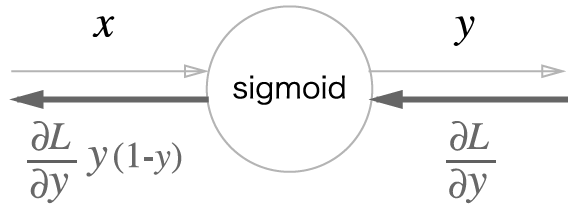

In [ ]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 /(1+np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout*(1.0 - self.out)*self.out
        return dx

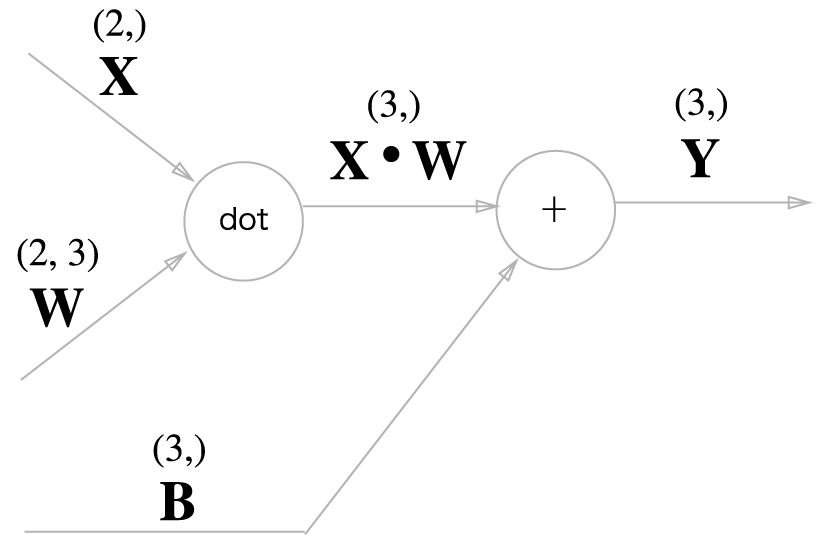

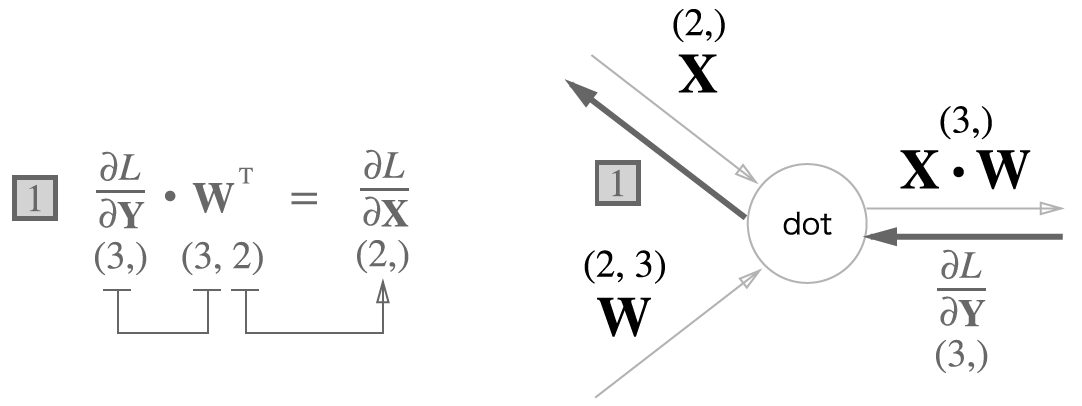

1 .
$$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} \frac{\partial Y}{\partial X}
= \frac{\partial L}{\partial Y}\frac{\partial (X \cdot W + B)}{\partial X}
= \frac{\partial L}{\partial Y}\frac{\partial (X \cdot W)}{\partial X}$$
$$ $$
일반적으로,
$$
X = \begin{pmatrix} x_1 \\ x_2 \\ \cdots \\ x_n \end{pmatrix}, \quad
W = \begin{pmatrix} w_1 \\ w_2 \\ \cdots \\ w_n \end{pmatrix}
$$

$$ \begin{matrix}
\frac{\partial (X \cdot W)}{\partial X} & = & \begin{pmatrix}
    {\frac{\partial (X^T W)}{\partial x_1}} \cdots
    {\frac{\partial (X^T W)}{\partial x_n}}
    \end{pmatrix} \\
    & = & \begin{pmatrix} {\frac{\partial (x_1w_1 + \cdots + x_nw_n)}{\partial x_1}} \cdots
    {\frac{\partial (x_1w_1 + \cdots + x_nw_n)}{\partial x_n}}
    \end{pmatrix} \end{matrix} $$

$$ $$
$$ = \begin{pmatrix} \frac{\partial (x_1 w_1)}{\partial x_1} \cdots \frac{\partial (x_n w_n)}{\partial x_n} \end{pmatrix}
= \begin{pmatrix} w_1 \cdots w_n \end{pmatrix} = W^T
$$


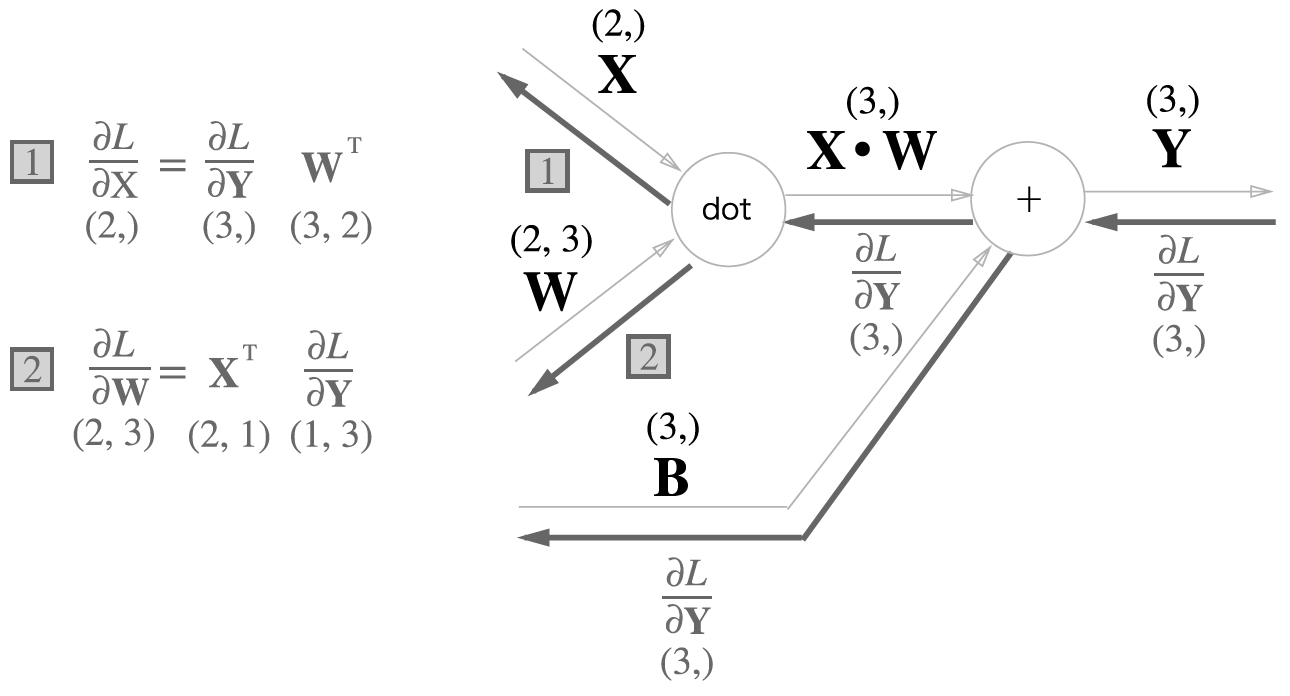

#Affine 층의 오차역전파

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx